In [1]:
import pandas as pd 
import numpy as np
import math
import keras
import tensorflow as tf
print(pd.__version__)
import progressbar
import os
from os import listdir

1.2.3


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.21.0

pandas    : 1.2.3
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.1
matplotlib: 3.3.4
h5py      : 2.10.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.8.0-48-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Fri Mar 26 2021 10:19:55CET



## Load of the data

   You can also load all of them! Writing "all_data"

In [3]:
os.listdir('../data/classifier/')

['inverse-compton.csv',
 '250.csv',
 '100-high-ene.csv',
 'latest.csv',
 '50.csv',
 '100.csv']

In [4]:
n = input('Which file do you want?')

Which file do you want?latest


In [5]:
if (n != 'all_data'): 
    print(2)

2


In [6]:
from process import loaddata
if n != 'all_data': 
    class_data = loaddata("../data/classifier/{}.csv".format(n))
if n == 'all_data': 
    files = os.listdir('../data/classifier/')
    for filename in files:
        class_data = loaddata("../data/classifier/{}".format(filename))

In [7]:
np.random.shuffle(class_data)
y = class_data[:,0]
x = class_data[:,1:]

In [8]:
x.shape

(162000, 10)

In [9]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 121500 
Valuation sample: 40500


In [10]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [12]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16 , activation = "relu" , input_dim = 10))
    model.add (layers.Dense (16, activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [13]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 1000, batch_size = 10000 , validation_data = (x_val, y_val) )
model.save("../models/classifier/{}_nodropout.h5".format(n))

Epoch 1/1000
13/13 [==============================] - 1s 28ms/step - loss: 0.7473 - accuracy: 0.4871 - val_loss: 0.7062 - val_accuracy: 0.5223
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7054 - accuracy: 0.5318 - val_loss: 0.6970 - val_accuracy: 0.5422
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6961 - accuracy: 0.5345 - val_loss: 0.6901 - val_accuracy: 0.5378
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5411 - val_loss: 0.6853 - val_accuracy: 0.5647
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6847 - accuracy: 0.5666 - val_loss: 0.6805 - val_accuracy: 0.5767
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5792 - val_loss: 0.6753 - val_accuracy: 0.5939
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6741 - accuracy: 0.6002 - val_loss: 0.6696 - val_accuracy: 0.6119
Epoch

13/13 [==============================] - 0s 7ms/step - loss: 0.0425 - accuracy: 0.9891 - val_loss: 0.0401 - val_accuracy: 0.9895
Epoch 116/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9895 - val_loss: 0.0396 - val_accuracy: 0.9896
Epoch 117/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0414 - accuracy: 0.9891 - val_loss: 0.0393 - val_accuracy: 0.9903
Epoch 118/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0407 - accuracy: 0.9894 - val_loss: 0.0390 - val_accuracy: 0.9906
Epoch 119/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0408 - accuracy: 0.9891 - val_loss: 0.0388 - val_accuracy: 0.9910
Epoch 120/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9898 - val_loss: 0.0385 - val_accuracy: 0.9911
Epoch 121/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0401 - accuracy: 0.9895 - val_loss: 0.0380 - val_accuracy: 0.9905
Epoch 1

Epoch 172/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0297 - accuracy: 0.9920 - val_loss: 0.0280 - val_accuracy: 0.9931
Epoch 173/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0295 - accuracy: 0.9920 - val_loss: 0.0278 - val_accuracy: 0.9929
Epoch 174/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.9922 - val_loss: 0.0278 - val_accuracy: 0.9931
Epoch 175/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0291 - accuracy: 0.9920 - val_loss: 0.0276 - val_accuracy: 0.9925
Epoch 176/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9920 - val_loss: 0.0277 - val_accuracy: 0.9917
Epoch 177/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.0273 - val_accuracy: 0.9929
Epoch 178/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9917 - val_loss: 0.0278 - val_accurac

Epoch 229/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0236 - accuracy: 0.9931 - val_loss: 0.0225 - val_accuracy: 0.9942
Epoch 230/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.0224 - val_accuracy: 0.9942
Epoch 231/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0224 - val_accuracy: 0.9936
Epoch 232/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.9934 - val_loss: 0.0223 - val_accuracy: 0.9941
Epoch 233/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.9936 - val_loss: 0.0224 - val_accuracy: 0.9943
Epoch 234/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0227 - accuracy: 0.9939 - val_loss: 0.0221 - val_accuracy: 0.9941
Epoch 235/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0227 - accuracy: 0.9938 - val_loss: 0.0221 - val_accuracy

Epoch 286/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0196 - accuracy: 0.9946 - val_loss: 0.0193 - val_accuracy: 0.9943
Epoch 287/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0207 - accuracy: 0.9939 - val_loss: 0.0195 - val_accuracy: 0.9941
Epoch 288/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0200 - accuracy: 0.9942 - val_loss: 0.0192 - val_accuracy: 0.9946
Epoch 289/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9942 - val_loss: 0.0192 - val_accuracy: 0.9946
Epoch 290/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.9940 - val_loss: 0.0193 - val_accuracy: 0.9952
Epoch 291/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9947 - val_loss: 0.0190 - val_accuracy: 0.9948
Epoch 292/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.9944 - val_loss: 0.0193 - val_accuracy:

Epoch 343/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9951 - val_loss: 0.0172 - val_accuracy: 0.9949
Epoch 344/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.0174 - val_accuracy: 0.9947
Epoch 345/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.0171 - val_accuracy: 0.9950
Epoch 346/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 0.0171 - val_accuracy: 0.9952
Epoch 347/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 0.9949 - val_loss: 0.0171 - val_accuracy: 0.9953
Epoch 348/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9948 - val_loss: 0.0174 - val_accuracy: 0.9956
Epoch 349/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0178 - accuracy: 0.9952 - val_loss: 0.0171 - val_accuracy:

Epoch 400/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0161 - accuracy: 0.9953 - val_loss: 0.0158 - val_accuracy: 0.9954
Epoch 401/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.0159 - val_accuracy: 0.9953
Epoch 402/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0162 - accuracy: 0.9953 - val_loss: 0.0157 - val_accuracy: 0.9956
Epoch 403/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.0160 - val_accuracy: 0.9958
Epoch 404/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.9952 - val_loss: 0.0158 - val_accuracy: 0.9959
Epoch 405/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0167 - accuracy: 0.9953 - val_loss: 0.0155 - val_accuracy: 0.9955
Epoch 406/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.0156 - val_accuracy

Epoch 457/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.0148 - val_accuracy: 0.9960
Epoch 458/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.0145 - val_accuracy: 0.9958
Epoch 459/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0150 - accuracy: 0.9956 - val_loss: 0.0146 - val_accuracy: 0.9961
Epoch 460/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0152 - accuracy: 0.9959 - val_loss: 0.0144 - val_accuracy: 0.9958
Epoch 461/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0151 - accuracy: 0.9957 - val_loss: 0.0145 - val_accuracy: 0.9958
Epoch 462/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 0.9958 - val_loss: 0.0146 - val_accuracy: 0.9956
Epoch 463/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.0145 - val_accuracy:

Epoch 514/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0140 - val_accuracy: 0.9960
Epoch 515/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 0.9959 - val_loss: 0.0141 - val_accuracy: 0.9963
Epoch 516/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0141 - accuracy: 0.9961 - val_loss: 0.0151 - val_accuracy: 0.9964
Epoch 517/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0147 - accuracy: 0.9960 - val_loss: 0.0139 - val_accuracy: 0.9960
Epoch 518/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.0140 - val_accuracy: 0.9959
Epoch 519/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0136 - accuracy: 0.9962 - val_loss: 0.0138 - val_accuracy: 0.9962
Epoch 520/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.0138 - val_accuracy:

Epoch 571/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.9962 - val_loss: 0.0134 - val_accuracy: 0.9960
Epoch 572/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0138 - accuracy: 0.9961 - val_loss: 0.0132 - val_accuracy: 0.9961
Epoch 573/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9960 - val_loss: 0.0134 - val_accuracy: 0.9960
Epoch 574/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.0135 - val_accuracy: 0.9963
Epoch 575/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.0138 - val_accuracy: 0.9962
Epoch 576/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.9961 - val_loss: 0.0136 - val_accuracy: 0.9964
Epoch 577/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.0136 - val_accuracy:

Epoch 628/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.0127 - val_accuracy: 0.9964
Epoch 629/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0130 - accuracy: 0.9965 - val_loss: 0.0129 - val_accuracy: 0.9966
Epoch 630/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 0.9967 - val_loss: 0.0132 - val_accuracy: 0.9965
Epoch 631/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0125 - accuracy: 0.9967 - val_loss: 0.0132 - val_accuracy: 0.9965
Epoch 632/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.0128 - val_accuracy: 0.9964
Epoch 633/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0133 - val_accuracy: 0.9960
Epoch 634/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0131 - accuracy: 0.9963 - val_loss: 0.0127 - val_accuracy:

Epoch 685/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.0123 - val_accuracy: 0.9967
Epoch 686/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0130 - accuracy: 0.9965 - val_loss: 0.0124 - val_accuracy: 0.9966
Epoch 687/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0125 - accuracy: 0.9966 - val_loss: 0.0124 - val_accuracy: 0.9965
Epoch 688/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.0129 - val_accuracy: 0.9959
Epoch 689/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.0125 - val_accuracy: 0.9966
Epoch 690/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.0124 - val_accuracy: 0.9965
Epoch 691/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0121 - accuracy: 0.9968 - val_loss: 0.0122 - val_accuracy

Epoch 742/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.0122 - val_accuracy: 0.9964
Epoch 743/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 0.0123 - val_accuracy: 0.9967
Epoch 744/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0122 - val_accuracy: 0.9965
Epoch 745/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0122 - accuracy: 0.9965 - val_loss: 0.0121 - val_accuracy: 0.9965
Epoch 746/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.0134 - val_accuracy: 0.9967
Epoch 747/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.9967 - val_loss: 0.0122 - val_accuracy: 0.9964
Epoch 748/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.0121 - val_accuracy:

Epoch 799/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9968 - val_loss: 0.0134 - val_accuracy: 0.9966
Epoch 800/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.0125 - val_accuracy: 0.9968
Epoch 801/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 0.9967 - val_loss: 0.0119 - val_accuracy: 0.9967
Epoch 802/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0.0119 - val_accuracy: 0.9966
Epoch 803/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 0.0132 - val_accuracy: 0.9965
Epoch 804/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9967 - val_loss: 0.0122 - val_accuracy: 0.9965
Epoch 805/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.9967 - val_loss: 0.0118 - val_accuracy:

Epoch 856/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0125 - val_accuracy: 0.9968
Epoch 857/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.0120 - val_accuracy: 0.9967
Epoch 858/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.0118 - val_accuracy: 0.9969
Epoch 859/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.0117 - val_accuracy: 0.9969
Epoch 860/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.9968 - val_loss: 0.0118 - val_accuracy: 0.9968
Epoch 861/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.0120 - val_accuracy: 0.9966
Epoch 862/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 0.9966 - val_loss: 0.0119 - val_accuracy:

Epoch 913/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.0115 - val_accuracy: 0.9968
Epoch 914/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.9967 - val_loss: 0.0126 - val_accuracy: 0.9963
Epoch 915/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.0115 - val_accuracy: 0.9969
Epoch 916/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.0114 - val_accuracy: 0.9969
Epoch 917/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.0114 - val_accuracy: 0.9968
Epoch 918/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.9968 - val_loss: 0.0117 - val_accuracy: 0.9969
Epoch 919/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.0115 - val_accuracy:

Epoch 970/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 0.9968 - val_loss: 0.0121 - val_accuracy: 0.9966
Epoch 971/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0.0116 - val_accuracy: 0.9969
Epoch 972/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.0118 - val_accuracy: 0.9967
Epoch 973/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.0115 - val_accuracy: 0.9968
Epoch 974/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0114 - val_accuracy: 0.9968
Epoch 975/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0113 - val_accuracy: 0.9968
Epoch 976/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.0112 - val_accuracy:

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


## Adding Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a
given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

##### [From Deep Learning with Python, Chollet]

<ipython-input-15-371c4d5f3f4d>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


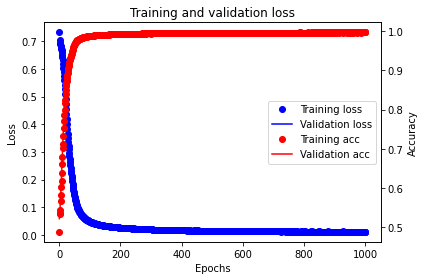

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('Accuracy')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
fig.savefig("acc+loss_drop.pdf")
fig.show()

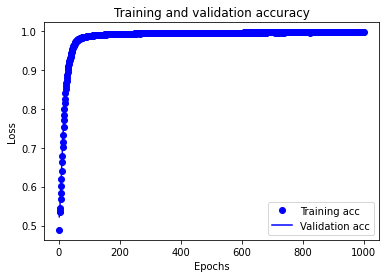

In [16]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16 , activation = "relu" , input_shape = input_shape = (None,10)))
    model.add (layers.Dense (16, activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

SyntaxError: invalid syntax (<ipython-input-17-81a95a394694>, line 3)

In [ ]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 1000, batch_size = 10000 , validation_data = (x_val, y_val) )
model.save("../models/classifier/{}_nodropout.h5".format(n))

In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('Accuracy')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
fig.savefig("acc+loss_drop.pdf")
fig.show()

In [ ]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Performance summary and dropout vs no dropout

In [ ]:
class_dropout = keras.models.load_model('../models/classifier/{}_dropout.h5'.format(n))
class_nodropout = keras.models.load_model('../models/classifier/{}_nodropout.h5'.format(n))

In [ ]:
class_dropout.fit(x_val, y_val)
class_nodropout.fit(x_val, y_val)

In [ ]:
class_dropout.fit(x_train, y_train)
class_nodropout.fit(x_train, y_train)

## Probability density distribution